# Perceptron

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Random Classification Data with two classes')

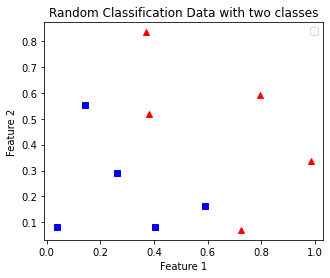

In [74]:
import matplotlib.pyplot as plt

x = np.array([[0.26256133, 0.29125676],
 [0.79376334, 0.59024795],
 [0.38081642, 0.51737814],
 [0.59034578, 0.16272269],
 [0.14400136, 0.55405123],
 [0.40249216, 0.08259556],
 [0.03759787, 0.08347492],
 [0.36891103, 0.83389343],
 [0.98339981, 0.33700999],
 [0.72305422, 0.07082393]])

Y = np.array([1,0,0,1,1,1,1,0,0,0])

fig = plt.figure(figsize=(5,4))
plt.plot(x[:, 0][Y==0], x[:, 1][Y==0], "r^")
plt.plot(x[:, 0][Y==1], x[:, 1][Y==1], "bs")

plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Random Classification Data with two classes')

In [86]:
import numpy as np

def step_func(z):
        return 1.0 if (z > 0) else 0.0
    
def perceptron(X, y, lr, epochs):
    
    # X --> Inputs.
    # y --> labels/target.
    # lr --> learning rate.
    # epochs --> Number of iterations.
    
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Initializing parapeters(theta) to zeros.
    # +1 in n+1 for the bias term.
    theta = np.zeros((n+1,1))
    
    # Empty list to store how many examples were 
    # misclassified at every iteration.
    n_miss_list = []
    
    # Training.
    for epoch in range(epochs):
        
        # variable to store #misclassified.
        n_miss = 0
        
        # looping for every example.
        for idx, x_i in enumerate(X):
            
            # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            
            # Calculating prediction/hypothesis.
            y_hat = step_func(np.dot(x_i.T, theta))
            
            # Updating if the example is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0:
                theta += lr*((y[idx] - y_hat)*x_i)
                
                # Incrementing by 1.
                n_miss += 1
        
        # Appending number of misclassified examples
        # at every iteration.
        n_miss_list.append(n_miss)
        
    return theta, n_miss_list

def plot_decision_boundary(X, theta):
    
    # X --> Inputs
    # theta --> parameters
    
    # The Line is y=mx+c
    # So, Equate mx+c = theta0.X0 + theta1.X1 + theta2.X2
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -theta[1]/theta[2]
    c = -theta[0]/theta[2]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][Y==0], X[:, 1][Y==0], "r^", markersize=10)
    plt.plot(X[:, 0][Y==1], X[:, 1][Y==1], "bs", markersize=10)
    plt.xlabel("Feature 1", fontsize=18)
    plt.ylabel("Feature 2", fontsize=18)
    plt.title("Random Classification Data with two classes", fontsize=18)    
    plt.plot(x1, x2, 'y-')
    plt.savefig("Perceptron.png")

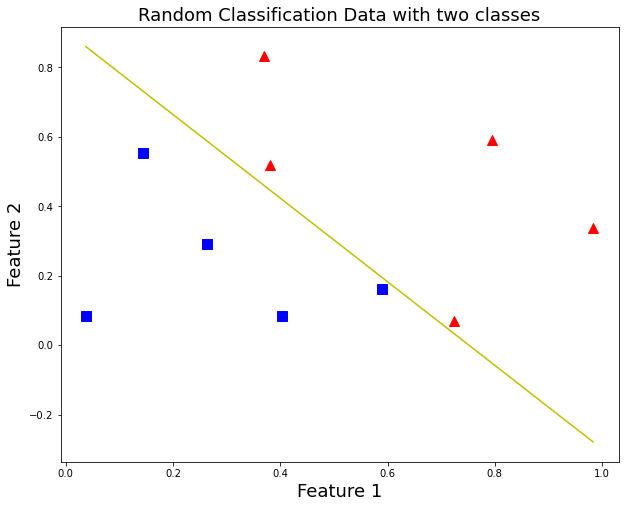

In [87]:
theta, miss_l = perceptron(x, Y, 0.5, 100)
plot_decision_boundary(x, theta)